# Machine learning Workshop (1. ELT and EDA)

## <u>Table of contents</u>

### 1. ELT and EDA

1. Import Python essential modules and dataset
2. Preliminary data and data understanding
3. Prepareing data before use in model

### 2. Modeling

1. Commonly Function hyperparameter
2. Commonly Model hyperparameter tuning
3. Import Python essential modules and dataset, and prepare data
4. Training model (1st attempt)
5. Error analysis
6. Training model (2nd attempt)
7. Save model

### 3. Inference

1. Import Python essential modules and dataset
2. Prepare data to for training data
3. Load Model
4. Predict with prepared data
5. Deploy with Gradio

---

## <u>Contents</u>

## 1. Data science workflow

Microsoft created the workflow diagram for data science is called `TDSP` (Team Data Science Process)

<img src="https://drive.google.com/uc?id=1LPCQ_9ASzFd0RPzDUsGsldWAFK33mghA" style="height:400px"/>

Reference: https://harshvardhan.blog/data-science-process-frameworks

## 2. Import Python essential modules and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from itertools import product

In [2]:
import warnings
warnings.filterwarnings("ignore")

The company has shared its annual car insurance data. Now, you have to find out the real customer behaviors over the data. <br><br>
Ref: https://www.kaggle.com/datasets/sagnik1511/car-insurance-data/data

In [3]:
data = pd.read_csv("dataset/train_data.csv")

The first task of data science is <b>data understanding</b>.

---

## 2. Preliminary data and data understanding

Understanding meaning and behavior of columns.

In [4]:
data.columns

Index(['ID', 'AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'POSTAL_CODE',
       'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

In [5]:
data.head()

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,101,65+,female,10-19y,university,upper class,0.459011,before 2015,1,1,92101,10000.0,sedan,1,0,0,0
1,125,40-64,male,20-29y,university,upper class,0.644759,after 2015,0,0,10238,15000.0,sedan,4,1,4,0
2,166,16-25,male,0-9y,university,upper class,0.531614,after 2015,0,0,10238,15000.0,sedan,0,0,0,0
3,186,26-39,male,0-9y,high school,working class,0.470394,before 2015,1,1,32765,8000.0,sedan,0,0,0,0
4,217,16-25,male,0-9y,none,poverty,NaN,before 2015,0,0,10238,17000.0,sedan,0,0,0,0


In this example, we can conclude the data information as following:

<table align="left">
    <tr>
        <th>No</th>
        <th>Column names</th>
        <th>Type</th>
        <th>Data unique</th>
        <th>Remark</th>
    </tr>
    <tr>
        <td>1</td>
        <td>ID</td>
        <td>Object</td>
        <td>-</td>
        <td>-</td>
    </tr>
    <tr>
        <td>2</td>
        <td>AGE</td>
        <td>Object (Category)</td>
        <td>['16-25', '26-39', '40-64', '65+']</td>
        <td>-</td>
    </tr>
    <tr>
        <td>3</td>
        <td>GENDER</td>
        <td>Object (Category)</td>
        <td>['male', 'female']</td>
        <td>-</td>
    </tr>
    <tr>
        <td>4</td>
        <td>DRIVING_EXPERIENCE</td>
        <td>Object (Category)</td>
        <td>['0-9y', '10-19y', '20-29y', '30y+']</td>
        <td>-</td>
    </tr>
    <tr>
        <td>5</td>
        <td>EDUCATION</td>
        <td>Object (Category)</td>
        <td>['none', 'high school', 'university']</td>
        <td>-</td>
    </tr>
    <tr>
        <td>6</td>
        <td>INCOME</td>
        <td>Object (Category)</td>
        <td>['poverty', 'working class', 'middle class', 'upper class']</td>
        <td>-</td>
    </tr>
    <tr>
        <td>7</td>
        <td>CREDIT_SCORE</td>
        <td>Float</td>
        <td>0.-1.</td>
        <td>-</td>
    </tr>
    <tr>
        <td>8</td>
        <td>VEHICLE_YEAR</td>
        <td>Object (Category)</td>
        <td>['before 2015', 'after 2015']</td>
        <td>-</td>
    </tr>
    <tr>
        <td>9</td>
        <td>MARRIED</td>
        <td>Bool</td>
        <td>[True, False]</td>
        <td>-</td>
    </tr>
    <tr>
        <td>10</td>
        <td>CHILDREN</td>
        <td>Bool</td>
        <td>[True, False]</td>
        <td>-</td>
    </tr>
    <tr>
        <td>11</td>
        <td>POSTAL_CODE</td>
        <td>Object</td>
        <td>-</td>
        <td>-</td>
    </tr>
    <tr>
        <td>12</td>
        <td>ANNUAL_MILEAGE</td>
        <td>Float</td>
        <td>0-inf</td>
        <td>-</td>
    </tr>
    <tr>
        <td>13</td>
        <td>VEHICLE_TYPE</td>
        <td>Object (Category)</td>
        <td>['sedan', 'sports car']</td>
        <td>-</td>
    </tr>
    <tr>
        <td>14</td>
        <td>SPEEDING_VIOLATIONS</td>
        <td>Int</td>
        <td>0-inf</td>
        <td>Counting number</td>
    </tr>
    <tr>
        <td>15</td>
        <td>DUIS</td>
        <td>Int</td>
        <td>0-inf</td>
        <td>Counting number <br> DUIS = Driving under the influence</td>
    </tr>
    <tr>
        <td>16</td>
        <td>PAST_ACCIDENTS</td>
        <td>Int</td>
        <td>0-inf</td>
        <td>Counting number</td>
    </tr>
    <tr>
        <td>17</td>
        <td>OUTCOME</td>
        <td>Bool, Target</td>
        <td>[True, False]</td>
        <td>True: claimed, False: not claimed</td>
    </tr>
</table>

Check the missing values and data type in each columns.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9940 entries, 0 to 9939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9940 non-null   int64  
 1   AGE                  9940 non-null   object 
 2   GENDER               9940 non-null   object 
 3   DRIVING_EXPERIENCE   9940 non-null   object 
 4   EDUCATION            9940 non-null   object 
 5   INCOME               9940 non-null   object 
 6   CREDIT_SCORE         8967 non-null   float64
 7   VEHICLE_YEAR         9940 non-null   object 
 8   MARRIED              9940 non-null   int64  
 9   CHILDREN             9940 non-null   int64  
 10  POSTAL_CODE          9940 non-null   int64  
 11  ANNUAL_MILEAGE       9001 non-null   float64
 12  VEHICLE_TYPE         9940 non-null   object 
 13  SPEEDING_VIOLATIONS  9940 non-null   int64  
 14  DUIS                 9940 non-null   int64  
 15  PAST_ACCIDENTS       9940 non-null   i

<b>Key finding </b> <br>
1. `MARRIED` and `ANNUAL_MILEAGE` columns have missing values.
2. `ID`, `MARRIED`, `CHILDREN`, `POSTAL_CODE`, and `OUTCOME` columns have wrong data type.

We change `ID`, `MARRIED`, `CHILDREN`, `POSTAL_CODE`, and `OUTCOME` to a correct data type.

In [7]:
data["ID"] = data["ID"].astype(object)
data["MARRIED"] = data["MARRIED"].astype(bool)
data["CHILDREN"] = data["CHILDREN"].astype(bool)
data["POSTAL_CODE"] = data["POSTAL_CODE"].astype(object)
data["OUTCOME"] = data["OUTCOME"].astype(bool)

### 2.1. Investigative numerical columns

We investigate the numerical columns via descriptive statistics.

In [8]:
numerical_col = ["CREDIT_SCORE", "ANNUAL_MILEAGE", "SPEEDING_VIOLATIONS", "DUIS", "PAST_ACCIDENTS"]

In [9]:
data[numerical_col].describe()

,CREDIT_SCORE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
count,8967.000000,9001.000000,9940.000000,9940.000000,9940.000000
mean,0.516332,11684.589157,1.481388,0.239336,1.057143
std,0.145516,2842.609453,2.240620,0.555196,1.651421
min,0.000000,-3.000000,0.000000,0.000000,0.000000
25%,0.417527,10000.000000,0.000000,0.000000,0.000000
50%,0.525150,12000.000000,0.000000,0.000000,0.000000
75%,0.618385,14000.000000,2.000000,0.000000,2.000000
max,4.960819,22000.000000,22.000000,6.000000,15.000000


<b>Key finding </b> <br>
The `ANNUAL_MILEAGE` and `CREDIT_SCORE` columns are out-of-range data

We need to drill down the data in the `ANNUAL_MILEAGE` and `CREDIT_SCORE` columns. <br>
We can investigate columns, as following:
- Filtering in the out-of-range data
- Visualizing distribution data in the interested column, such as, boxplot, histogram.

In [10]:
# Trying drill down on the `CREDIT_SCORE` column by using filtering data
data.loc[data["CREDIT_SCORE"] > 1, :]

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
8157,825288,40-64,male,10-19y,university,upper class,4.960819,after 2015,False,True,10238,10000.0,sedan,1,0,1,False


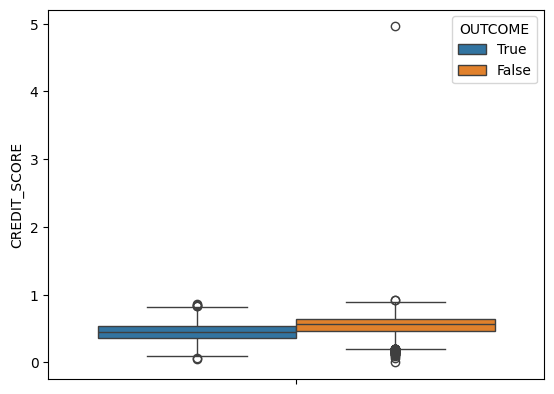

In [11]:
# Example of boxplot
sns.boxplot(y=data["CREDIT_SCORE"], hue=data["OUTCOME"], hue_order=[True, False])
plt.show()

Maybe, it was a calculation error. <br>
We will solve this problem by changing the values to NaN

In [12]:
data.loc[data["CREDIT_SCORE"] > 1, "CREDIT_SCORE"] = pd.NA

---

### Exercise 1

How we can investigate problem in the `ANNUAL_MILEAGE` column and solve that issue?

In [13]:
# Write the code for exercise 1-1 here.
data.loc[data["ANNUAL_MILEAGE"] < 0, :]

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
883,85568,65+,male,20-29y,university,upper class,0.414302,before 2015,True,True,10238,-1.0,sedan,1,0,1,False
1472,145134,40-64,female,20-29y,university,upper class,0.570131,before 2015,False,True,32765,-1.0,sedan,1,0,2,False
4102,415320,16-25,male,0-9y,none,poverty,0.392178,before 2015,True,False,10238,-2.0,sedan,0,0,0,True
4715,475443,16-25,male,0-9y,high school,poverty,0.259411,before 2015,False,False,32765,-2.0,sedan,0,0,0,False
4762,479789,26-39,male,10-19y,high school,poverty,NaN,before 2015,False,False,10238,-1.0,sedan,1,0,2,True
5655,569640,16-25,female,0-9y,university,upper class,0.591260,before 2015,False,True,10238,-1.0,sedan,0,0,0,False
5911,596657,65+,male,30y+,high school,upper class,0.524332,before 2015,False,True,10238,-2.0,sedan,6,0,2,False
6535,659210,65+,female,20-29y,high school,upper class,0.700841,after 2015,True,True,10238,-3.0,sedan,1,1,1,False


In [14]:
data.loc[data["ANNUAL_MILEAGE"] < 0, "ANNUAL_MILEAGE"] = 0

In [15]:
data[data["ANNUAL_MILEAGE"] < 0]

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME


---

We check other numerical columns via counting frequency. <br>
But in this exercise, we will show only the `PAST_ACCIDENTS` column.

We can count frequency, as following:
- A `value_counts` method in the Pandas library
- Visualizing frequency in the interested column, such as, bar plot.

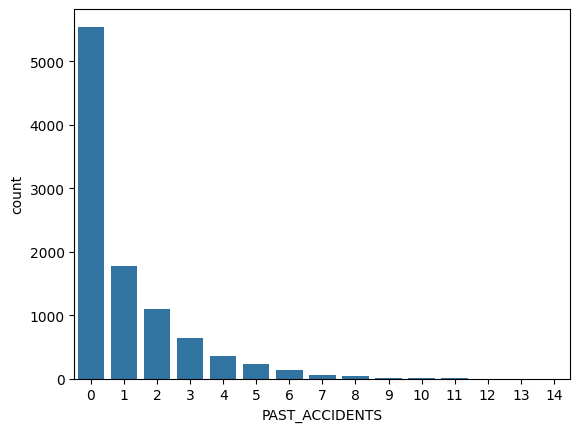

In [16]:
# Checking count frequency by using "value_counts" method in the Pandas library
sns.countplot(
    x=data["PAST_ACCIDENTS"],
    order=range(data["PAST_ACCIDENTS"].min(), data["PAST_ACCIDENTS"].max())
)
plt.show()

In [17]:
# Example of "value_counts" method in the Pandas
data["PAST_ACCIDENTS"].value_counts().sort_index()

PAST_ACCIDENTS
0     5548
1     1770
2     1099
3      644
4      364
5      232
6      144
7       61
8       40
9       19
10       8
11       7
12       2
14       1
15       1
Name: count, dtype: int64

There is nothing wrong in the `PAST_ACCIDENTS` column.

We can create data binning column in any numerical columns. <br>
It can be automatically created from the `cut` and `qcut` method. <br>
But in this example, we will create from the custom function in the `PAST_ACCIDENTS` column.

A Example case:
- "Never": [0]
- "Rarely": [1,2]
- "Often": [3,4,5,6,7,8,9,10,11,12,13,14]

In [18]:
def accident_binning(row):
    past_accident = row["PAST_ACCIDENTS"]
    if past_accident in [0]:
        return "Never"
    elif past_accident in [1,2]:
        return "Rarely"
    else:
        return "Often"

In [19]:
data["FREQUENT_ACCIDENT"] = data.apply(accident_binning, axis=1)

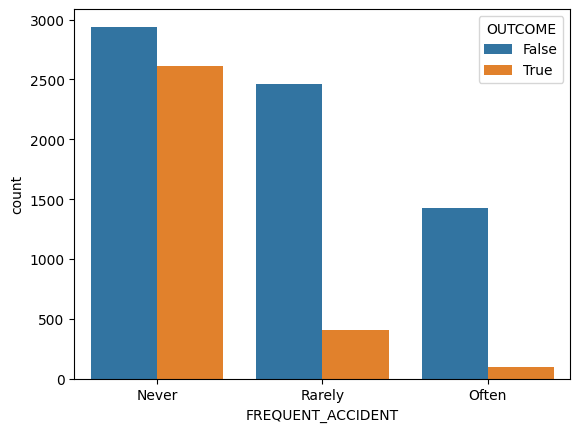

In [20]:
sns.countplot(x=data["FREQUENT_ACCIDENT"], hue=data["OUTCOME"], order=["Never", "Rarely", "Often"])
plt.show()

### 2.2. Investigative categorical columns

Same as above, We investigate categorical columns by using descriptive statistics.

In [21]:
categorical_col = ["AGE", "GENDER", "DRIVING_EXPERIENCE", "EDUCATION", "INCOME", "VEHICLE_YEAR", "MARRIED", "CHILDREN", "VEHICLE_TYPE", "OUTCOME"]

In [22]:
data[categorical_col].describe()

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,MARRIED,CHILDREN,VEHICLE_TYPE,OUTCOME
count,9940,9940,9940,9940,9940,9940,9940,9940,9940,9940
unique,5,7,5,4,5,3,2,2,3,2
top,26-39,female,0-9y,high school,upper class,before 2015,False,True,sedan,False
freq,3040,4767,3508,4136,4310,6921,4984,6845,9463,6823


<b>Key finding </b> <br>
- The `GENDER` column has too many distinct count.
- Except in boolean column, there are extra a distinct count.

We need to drill down the data.

We can check unique values, as following:
- A `unique` method in the Pandas library
- A `value_counts` method in the Pandas library
- Visualizing frequency in the interested column, such as, bar plot.

Starting drill down in the `GENDER` column.

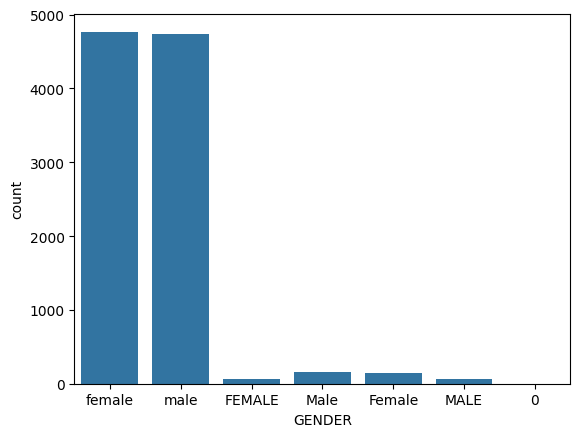

In [23]:
# Checking unique value by using visualizing frequency
sns.countplot(x=data["GENDER"])
plt.show()

In [25]:
# Example of "unique" method in the Pandas library
data["GENDER"].unique()

array(['female', 'male', 'FEMALE', 'Male', 'Female', 'MALE', '0'],
      dtype=object)

In [26]:
# Example of "value_counts" method in the Pandas library
data["GENDER"].value_counts()

GENDER
female    4767
male      4734
Male       160
Female     151
FEMALE      64
MALE        63
0            1
Name: count, dtype: int64

Found that, the letter format in the `GENDER` column is not same and has abnormal value (0). <br>
We check abnormal value row in the data.

In [27]:
data[data["GENDER"] == "0"]

,ID,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,FREQUENT_ACCIDENT
9939,999999,0,0,0,0,0,0.0,0,False,False,0,0.0,0,0,0,0,False,Never


It seems has error row in the data. We will remove it.

In [28]:
data = data[data["GENDER"] != "0"]

Then, we will fix letter format in `GENDER` column by changing to lower case.

In [29]:
data["GENDER"] = data["GENDER"].str.lower()

We check counting frequency in the categorical column. <br>
But in this exercise, we will show only the `MARRIED` column.

In [30]:
vehicle_count = data[["VEHICLE_TYPE", "OUTCOME"]].value_counts()
vehicle_count

VEHICLE_TYPE  OUTCOME
sedan         False      6501
              True       2962
sports car    False       321
              True        155
Name: count, dtype: int64

We can change value to percentage of total each category.

In [31]:
(vehicle_count / vehicle_count.groupby(level=0).transform('sum')) * 100

VEHICLE_TYPE  OUTCOME
sedan         False      68.699144
              True       31.300856
sports car    False      67.436975
              True       32.563025
Name: count, dtype: float64

---

## 3. Prepareing data before use in model

We delete the `ID` and `POSTAL_CODE` columns which is not relevan in the target column.

In [32]:
data = data.drop(["ID", "POSTAL_CODE"], axis=1)

Then, we drop duplicated rows because the most of ML assumptions is independent.

In [33]:
data = data.drop_duplicates()

Some models can handle training with missing values, such as decision trees, random forests, and XGBoost. <br>
However, others, like linear regression, logistic regression, and support vector machines, require dataset without missing values.

Next, we talk about relationship between 2 variables. <br>
A type of column must be considered because it effect method to calculate.

<table align="left">
    <tr>
        <th></th>
        <th>Categorical column</th>
        <th>Numerical column</th>
    </tr>
    <tr>
        <td>Categorical column</td>
        <td>Chi-Square Test</td>
        <td>One-way ANOVA test</td>
    </tr>
    <tr>
        <td>Numerical column</td>
        <td>One-way ANOVA test</td>
        <td>Pearson correlation <br> Spearman's rank correlation</td>
    </tr>
</table>

### 3.1. Numerical - Numerical

We can calulate pearson correlation to measure linear relationship between 2 numerical variables.

There are 5 cases to interprete pearson correlation value. <br>

<table align="left">
    <tr>
        <th>|x|</th>
        <th>meaning</th>
    </tr>
    <tr>
        <td>0 and 0.05</td>
        <td>no correlation</td>
    </tr>
    <tr>
        <td>0.05 and 0.20</td>
        <td>weak correlation</td>
    </tr>
    <tr>
        <td>0.20 and 0.70</td>
        <td>medium correlation</td>
    </tr>
    <tr>
        <td>0.70 and 0.95</td>
        <td>strong correlation</td>
    </tr>
    <tr>
        <td>0.95 and 1.00</td>
        <td>Columns can be used interchangeably.</td>
    </tr>
</table>

The sign of the coefficient mean the direction of the relationship.

In [34]:
numerical_col = ["CREDIT_SCORE", "ANNUAL_MILEAGE", "SPEEDING_VIOLATIONS", "DUIS", "PAST_ACCIDENTS"]

In [35]:
# method{‘pearson’, ‘spearman’}
data[numerical_col].corr()

,CREDIT_SCORE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
CREDIT_SCORE,1.000000,-0.171447,0.205419,0.128675,0.181953
ANNUAL_MILEAGE,-0.171447,1.000000,-0.319732,-0.113854,-0.192030
SPEEDING_VIOLATIONS,0.205419,-0.319732,1.000000,0.359546,0.442187
DUIS,0.128675,-0.113854,0.359546,1.000000,0.257186
PAST_ACCIDENTS,0.181953,-0.192030,0.442187,0.257186,1.000000


### 3.2. Categorical - Categorical

It is not make sense to use pearson correlation to measure relationship in categorical variables. <br>
We must use Chi-Square Test to test relationship.

In [36]:
categorical_col_1 = ["AGE", "GENDER", "DRIVING_EXPERIENCE", "EDUCATION", "INCOME", "VEHICLE_YEAR", "MARRIED", "CHILDREN", "VEHICLE_TYPE", "FREQUENT_ACCIDENT"]
categorical_col_2 = ["OUTCOME"]

In [37]:
cat_var_prod = list(product(categorical_col_1, categorical_col_2, repeat = 1))

In [38]:
result = []
for col_name in cat_var_prod:
    if col_name[0] != col_name[1]:
        result.append(
            (
                col_name[0],
                col_name[1],
                list(ss.chi2_contingency(pd.crosstab(data[col_name[0]], data[col_name[1]])))[1]
            )
        )

In [39]:
chi_test_output = pd.DataFrame(result, columns = ["var1", "var2", "coeff"])
chi_test_output.pivot(index="var1", columns="var2", values="coeff")

var2,OUTCOME
var1,
AGE,0.000000e+00
CHILDREN,1.062017e-116
DRIVING_EXPERIENCE,0.000000e+00
EDUCATION,6.876765e-77
FREQUENT_ACCIDENT,0.000000e+00
GENDER,1.634824e-26
INCOME,0.000000e+00
MARRIED,1.295321e-146
VEHICLE_TYPE,5.346196e-01


All categorical columns except `VEHICLE_TYPE` have relationship in `OUTCOME` column (p value ≤ 0.05)

### 3.3. Numerical - Categorical

We can use one-way ANOVA test to measure relationship between numerical and categorical variable.

In [40]:
numerical_col = ["CREDIT_SCORE", "ANNUAL_MILEAGE", "SPEEDING_VIOLATIONS", "DUIS", "PAST_ACCIDENTS"]
categorical_col = ["OUTCOME"]

In [41]:
var_prod = list(product(numerical_col, categorical_col, repeat = 1))

In [42]:
result = []
for col_name in var_prod:
    unique_cat = data[col_name[1]].unique()
    numerical_list = []
    for unique in unique_cat:
        numerical_list.append(data.loc[data[col_name[1]] == unique, col_name[0]].dropna().to_list())

    result.append(
            (
                col_name[0],
                col_name[1],
                ss.f_oneway(*numerical_list).pvalue
            )
        )

In [43]:
chi_test_output = pd.DataFrame(result, columns = ["var1", "var2", "coeff"])
chi_test_output.pivot(index="var1", columns="var2", values="coeff")

var2,OUTCOME
var1,
ANNUAL_MILEAGE,6.522732e-69
CREDIT_SCORE,2.766964e-219
DUIS,7.923098e-80
PAST_ACCIDENTS,2.949995e-220
SPEEDING_VIOLATIONS,1.185613e-191


All numerical columns have relationship in the `OUTCOME` column (p value ≤ 0.05)

From relationship test, we remove the `VEHICLE_TYPE` column in the data.

In [44]:
data = data.drop(["VEHICLE_TYPE"], axis=1)

Last, we save dataset before use it for model training.

In [45]:
data.to_csv("data_prepared.csv", index=False)

---
---